<a href="https://colab.research.google.com/github/euclideands/Programming_Dumps/blob/main/games_prep_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
# data wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
raw_df_games = pd.read_csv('/content/drive/MyDrive/Data Mining/games.csv')
raw_df_games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


What most interesting about this dataset is we can make game reccomendation system.

In [ ]:
raw_df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

# Data Cleaning

## 1. Delete Unused Column

In [ ]:
# Delete unused column
df = raw_df_games.drop(columns=['id'])
df

,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


## 2. Delete NaN Value

In [ ]:
# Checking NaN value
df.isnull().sum()

type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [ ]:
# Count rows with NaN values
nan_rows_count = df.isnull().any(axis=1).sum()

print("Number of rows with NaN values:", nan_rows_count)

Number of rows with NaN values: 44


In [ ]:
percentage_rows_with_missing = (nan_rows_count / len(df)) * 100
print(f"Persentage of rows with NaN value/s: {percentage_rows_with_missing:.2f}%")

Persentage of rows with NaN value/s: 0.05%


Because the percentage of NaN value is less than 5% so we will delete the NaN value.

In [ ]:
# Delete rows contain NaN value
df.dropna(inplace=True)

In [ ]:
df.shape

(81268, 19)

## 3. Delete Duplicate Data

In [ ]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1853, 19)


In [ ]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 93.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5d372eac98dd4ad981bb86f14413cb100cc93e0038cf3cf066a29c8b95834275
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all

In [ ]:


# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicates = len(duplicate_rows)

# Display the duplicate rows and the count
print("Duplicate Rows:")
print(duplicate_rows)
print(f"Number of duplicate rows: {num_duplicates}")


Duplicate Rows:
                     type                                       name  \
1800            boardgame                          Twilight Struggle   
1801            boardgame                              Terra Mystica   
1802            boardgame                  Caverna: The Cave Farmers   
1803            boardgame  Through the Ages: A Story of Civilization   
1804            boardgame                                Puerto Rico   
...                   ...                                        ...   
80400           boardgame      En la escena del Crimen: Especial CSI   
80600           boardgame                       Masters of the Heist   
80601           boardgame                               Creepy Falls   
81100           boardgame                               Memo Extreme   
81101  boardgameexpansion               N30N City Rumble: Final Boss   

       yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
1800          2005.0         2.0         2.0 

# EDA

We want to convert 'yearpublished' column into datetime dtype. But before that, lets check is there any

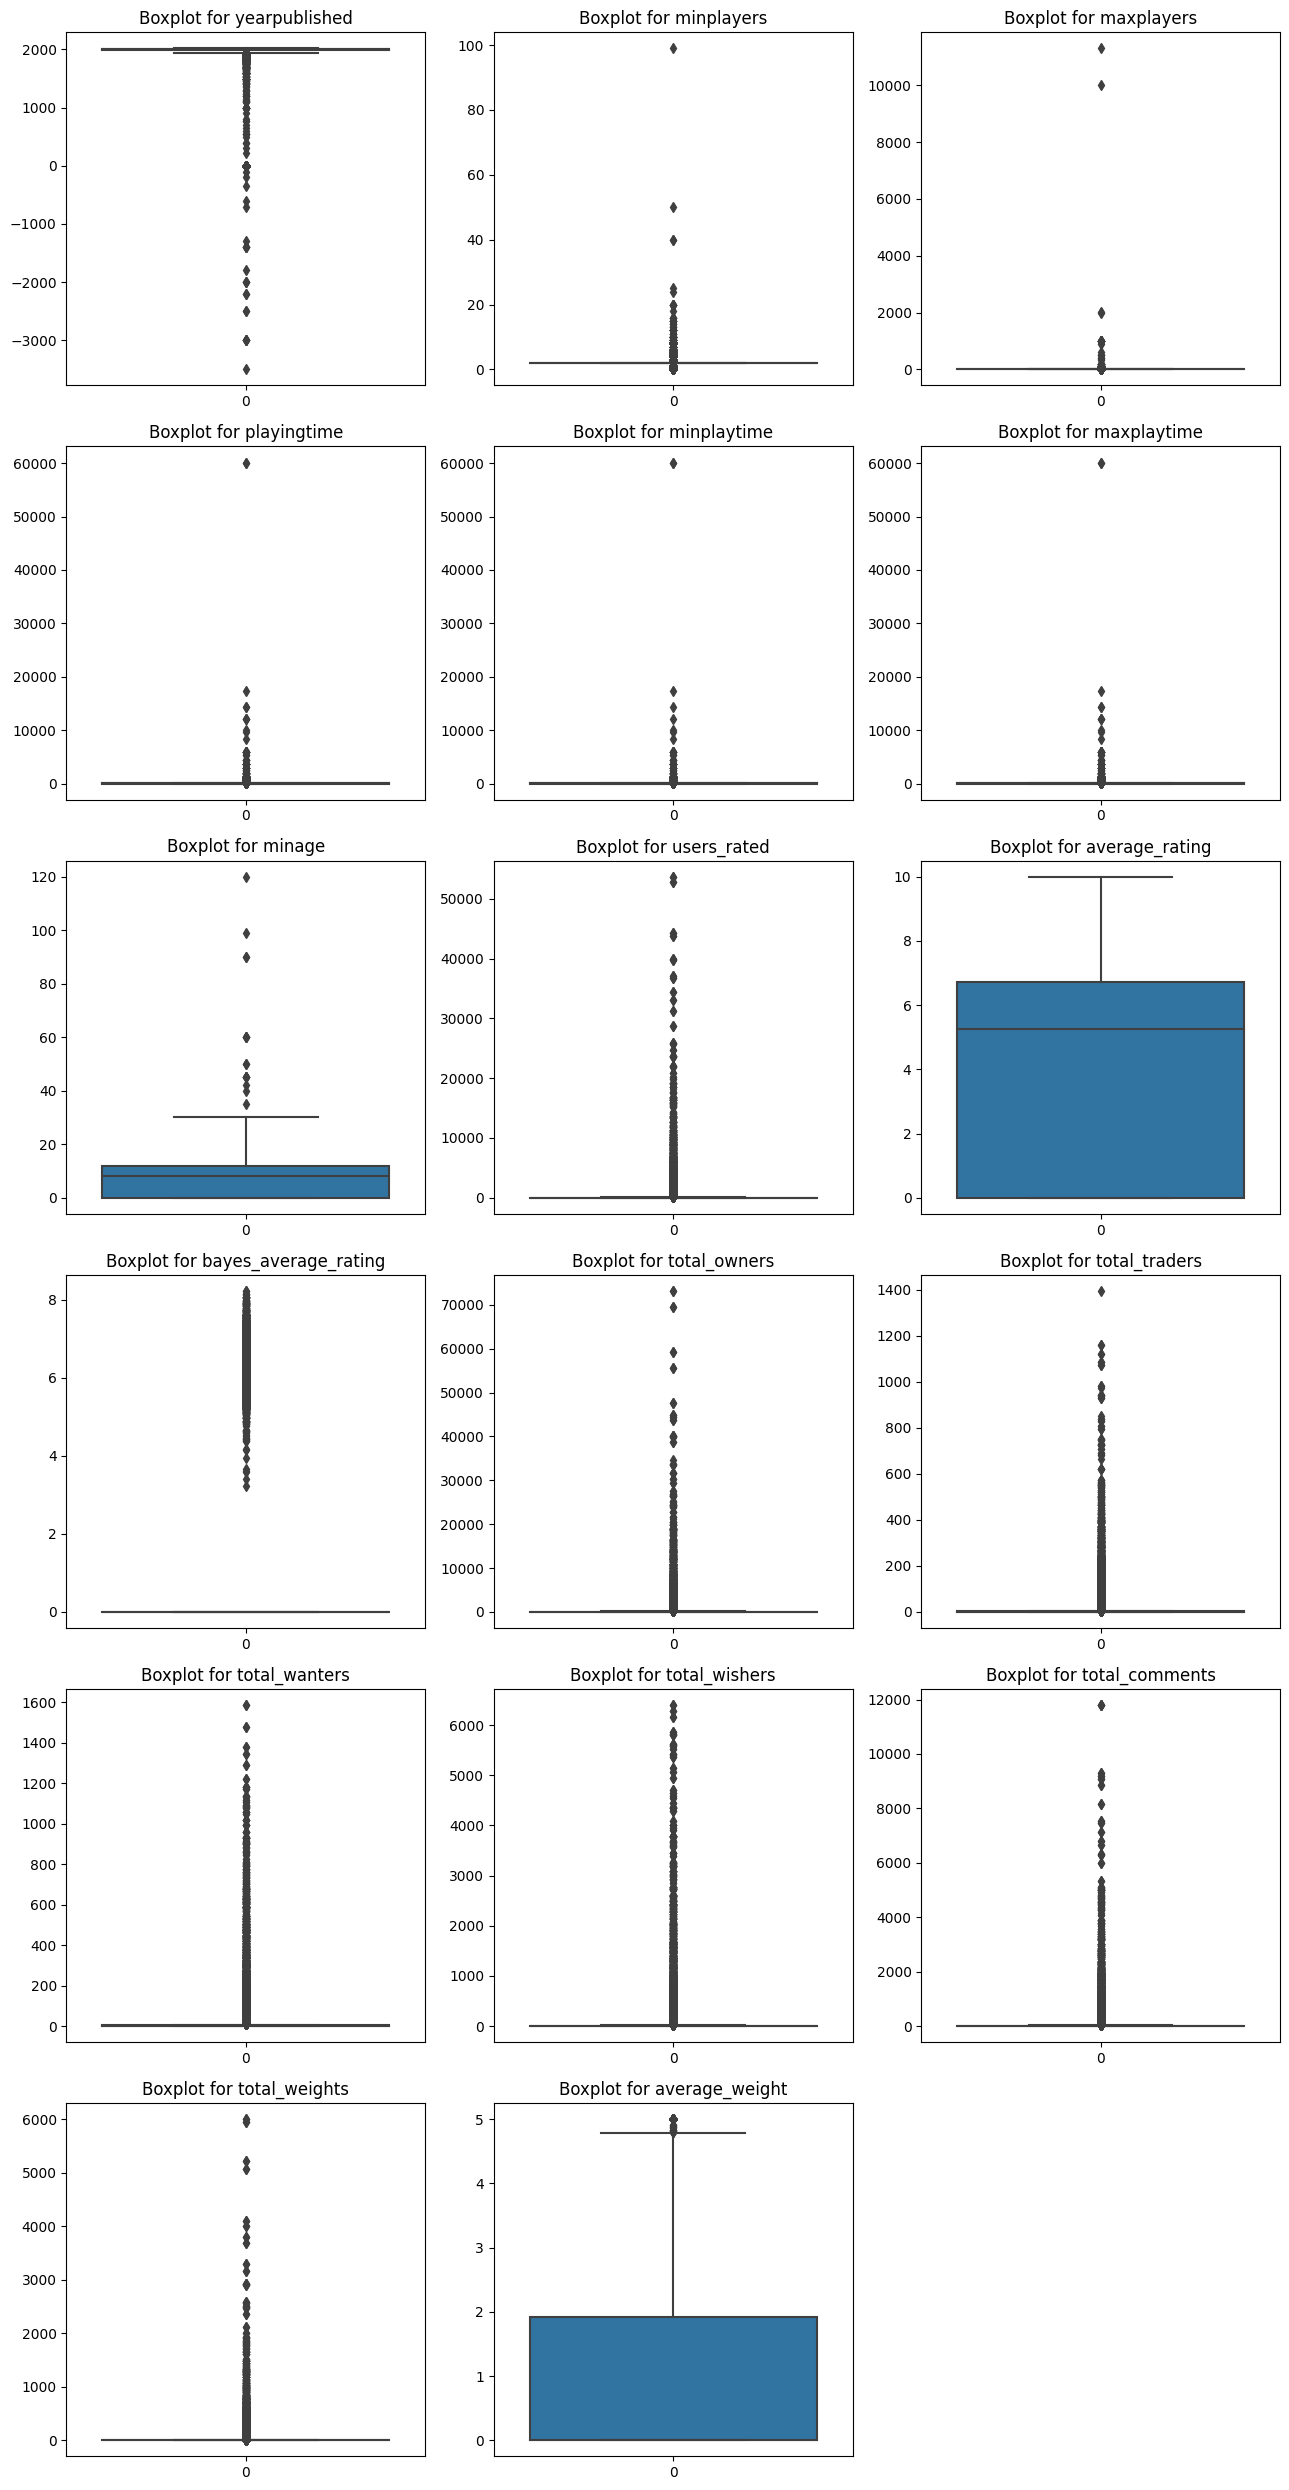

In [ ]:
# Get all numeric columns except the ones in the exclusion list
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 25))

# Loop through the numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)  # Calculate row and column indices
    sns.boxplot(df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')

# Remove any empty subplots
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-17-041cc52ffbe0>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], ax=axes[i])


AttributeError: ignored

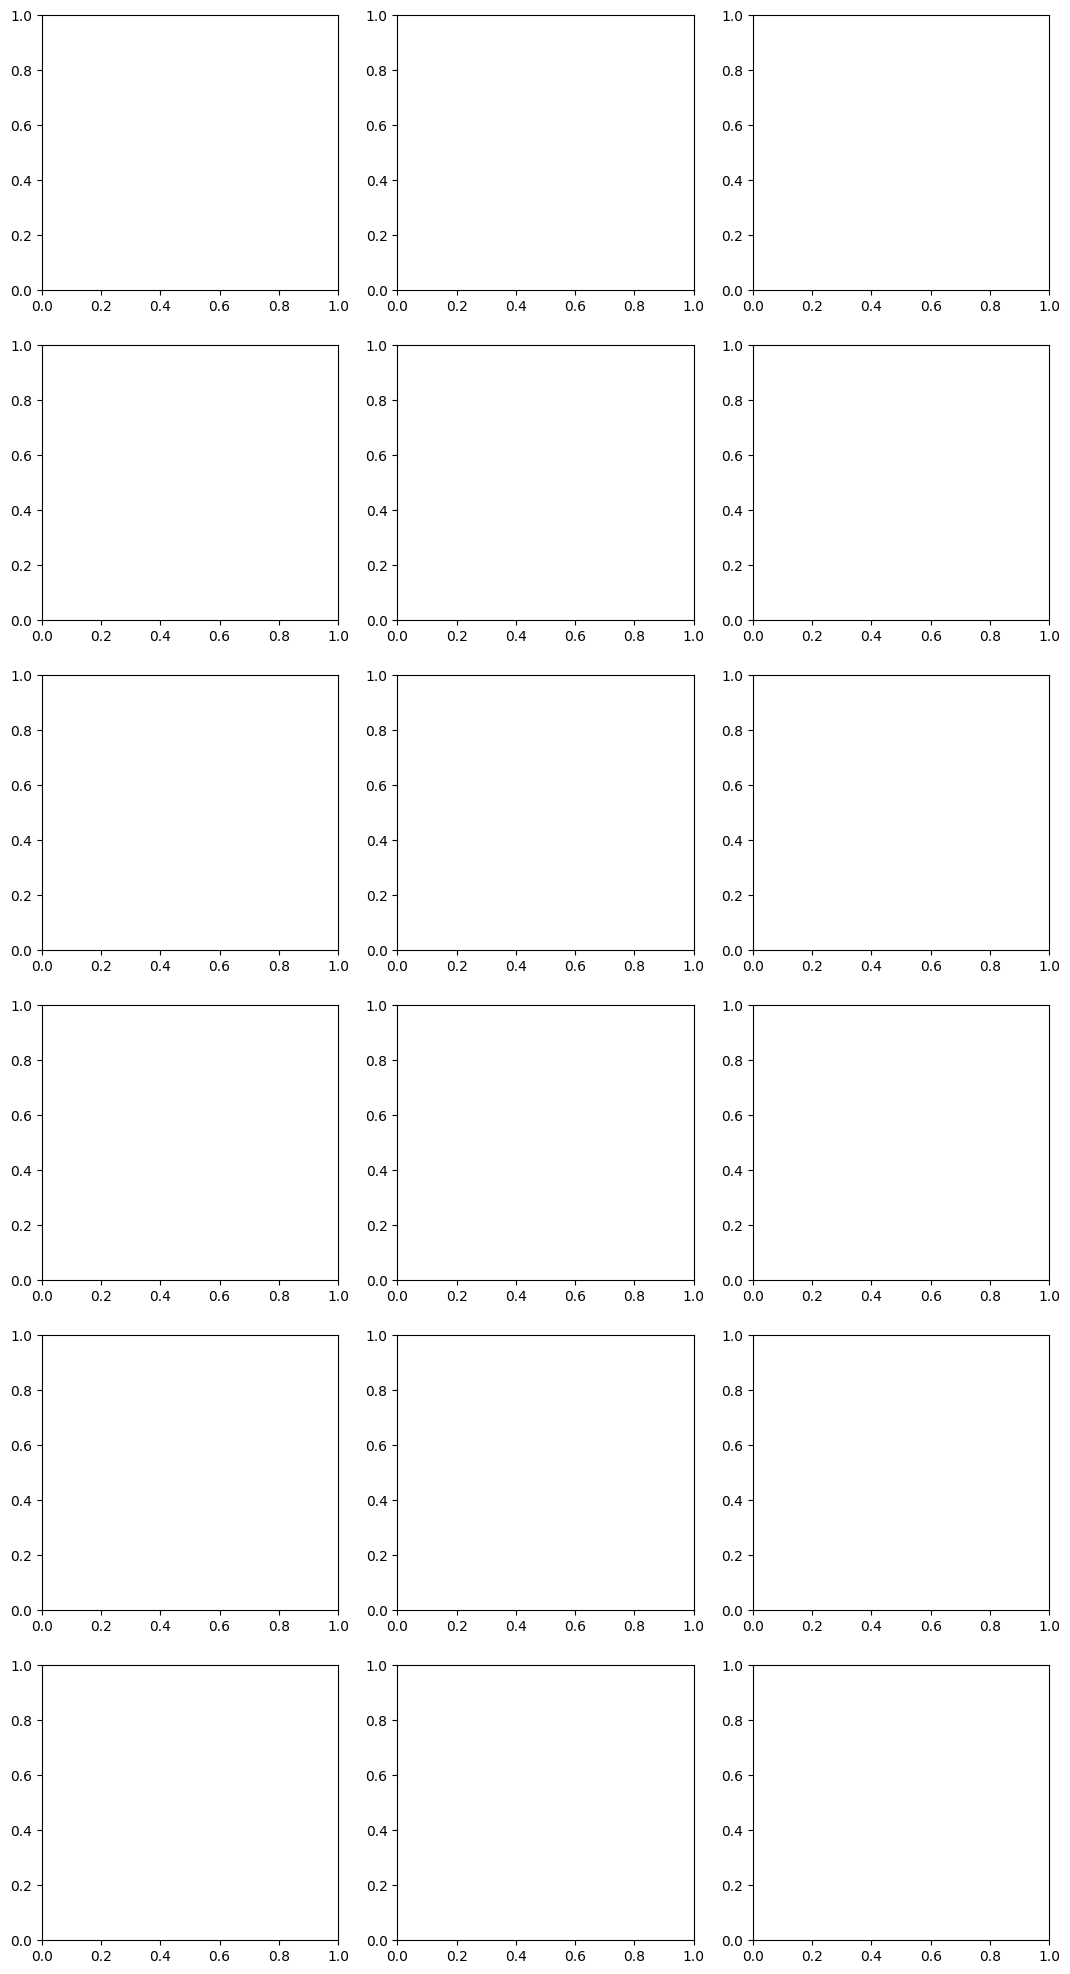

In [ ]:
# Get all numeric columns except the ones in the exclusion list
numeric_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

# Calculate the number of rows and columns for the grid
num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)  # Calculate the number of rows needed

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 25))

# Loop through the numeric columns and create boxplots
for i, column in enumerate(numeric_columns):
    row, col = divmod(i, num_cols)  # Calculate row and column indices
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

# Remove any empty subplots
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df
